In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics 
from sklearn.metrics import classification_report,  confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, roc_curve,roc_auc_score



cleanonehot=pd.read_csv('clean.csv')

cleanlabeled=pd.read_csv('labeled.csv')

Defining x and y variables and splitting the data into a 70/30 train/test ratio

In [2]:
X=cleanonehot.drop(columns='y_encoded', axis=1)
y=cleanonehot['y_encoded']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size= 0.30, random_state=16)

Setting up tests for the one-hot dataset; we are going to use one-hot for models where rank significance is assumed, that is to say, the order of a number matters to the model.

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10787
           1       0.63      0.37      0.47      1330

    accuracy                           0.91     12117
   macro avg       0.78      0.67      0.71     12117
weighted avg       0.89      0.91      0.90     12117



/Users/michaelgriffin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


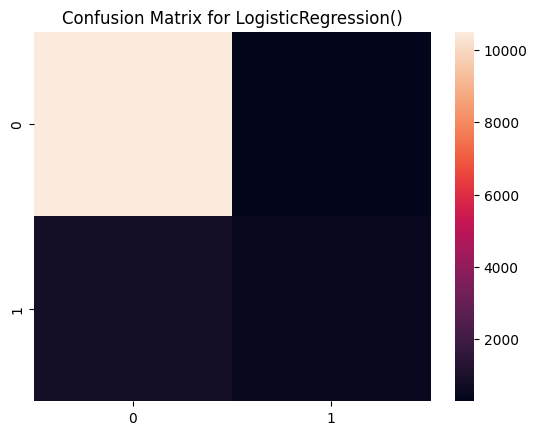

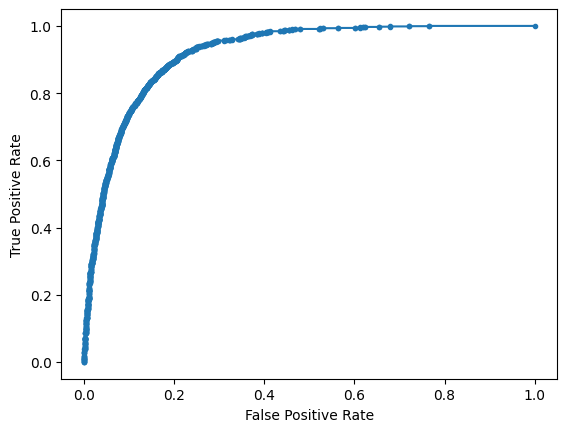

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10787
           1       0.60      0.50      0.55      1330

    accuracy                           0.91     12117
   macro avg       0.77      0.73      0.75     12117
weighted avg       0.90      0.91      0.91     12117



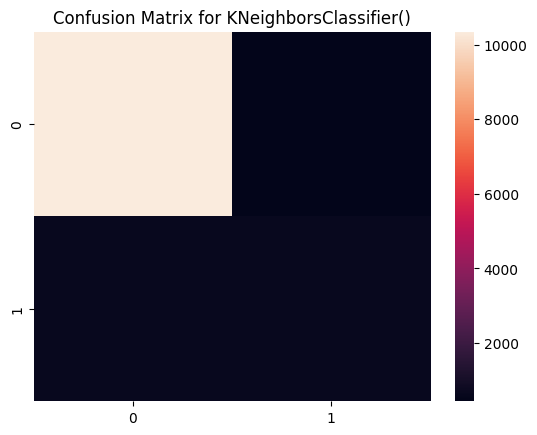

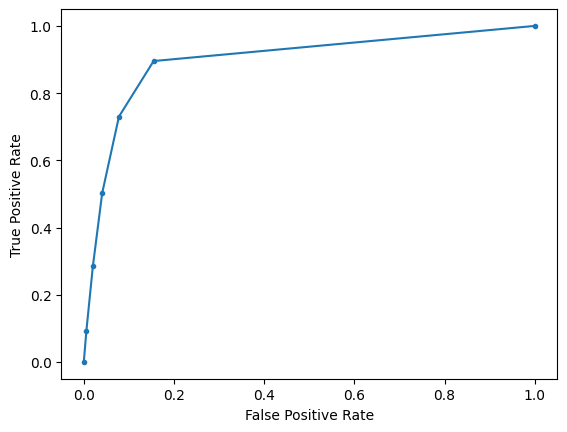

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     10787
           1       0.33      0.65      0.44      1330

    accuracy                           0.82     12117
   macro avg       0.64      0.75      0.67     12117
weighted avg       0.88      0.82      0.84     12117



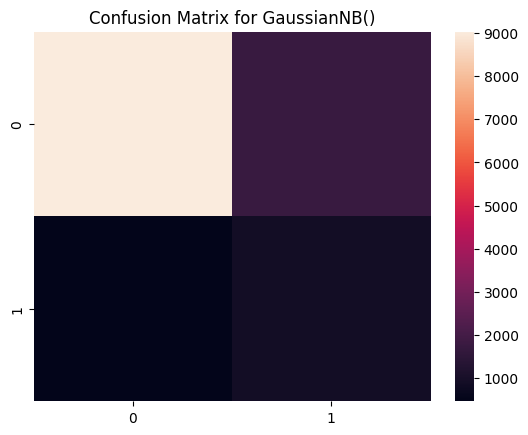

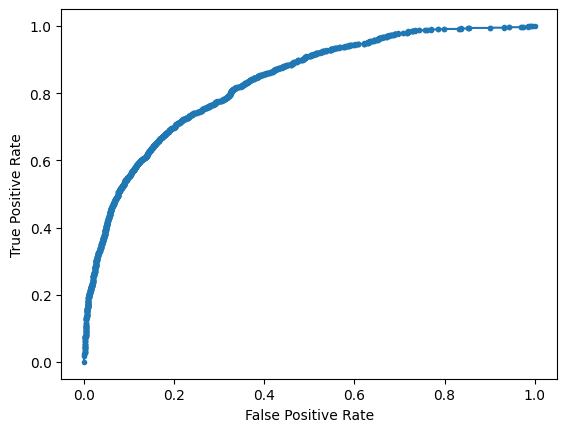

In [3]:
for model_class in [LogisticRegression, KNeighborsClassifier, GaussianNB]:
    model=model_class()
    prediction=model.fit(X_train, y_train).predict(X_test)
    print(classification_report(y_test, prediction)) 
    sns.heatmap(confusion_matrix(y_test, prediction))
    plt.title(f'Confusion Matrix for {model}')
    plt.show()
    probs=model.predict_proba(X_test)[:,1]
    auc=roc_auc_score(y_test, probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, probs)
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()  

Setting up tests for the labeled dataset: this is used for models where rank is not significant.

In [4]:
x=cleanlabeled.drop(columns='y_encoded',axis=1)
target=cleanlabeled['y_encoded']
x_train,x_test,Y_train,Y_test=train_test_split(x,target, test_size=0.30,random_state=16)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10787
           1       0.51      0.53      0.52      1330

    accuracy                           0.89     12117
   macro avg       0.73      0.74      0.73     12117
weighted avg       0.90      0.89      0.89     12117



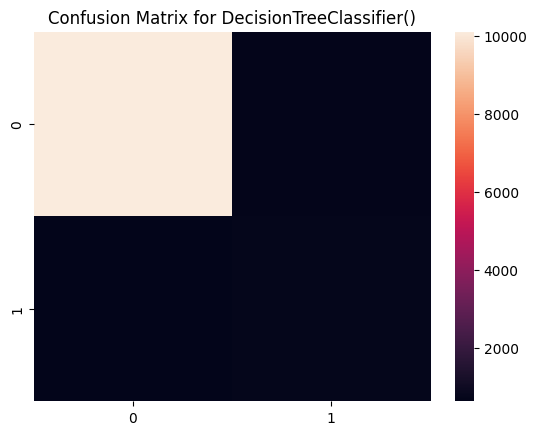

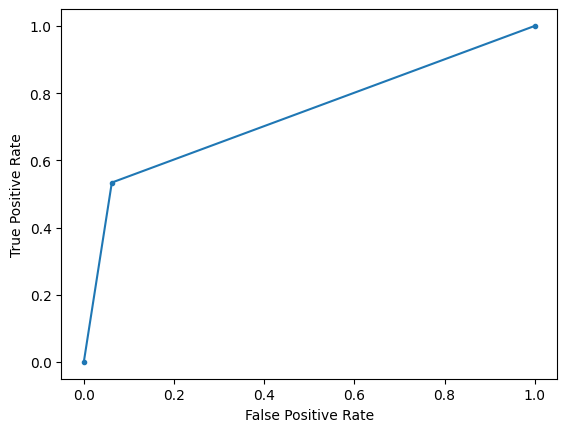

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10787
           1       0.64      0.51      0.57      1330

    accuracy                           0.91     12117
   macro avg       0.79      0.74      0.76     12117
weighted avg       0.91      0.91      0.91     12117



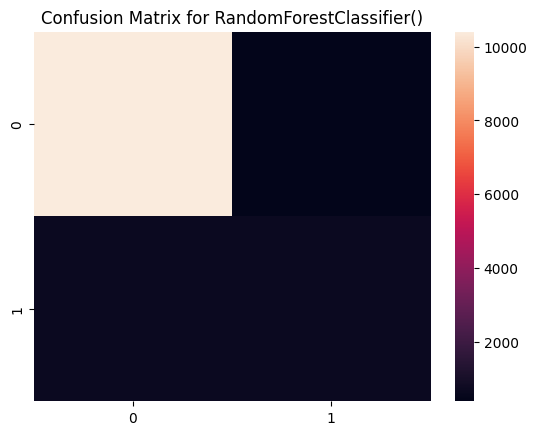

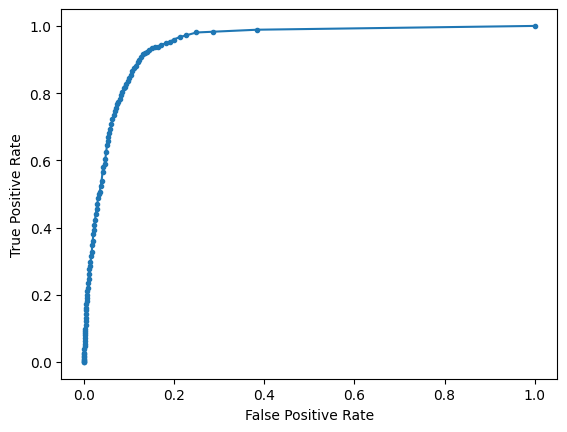

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     10787
           1       0.67      0.52      0.59      1330

    accuracy                           0.92     12117
   macro avg       0.81      0.74      0.77     12117
weighted avg       0.91      0.92      0.91     12117



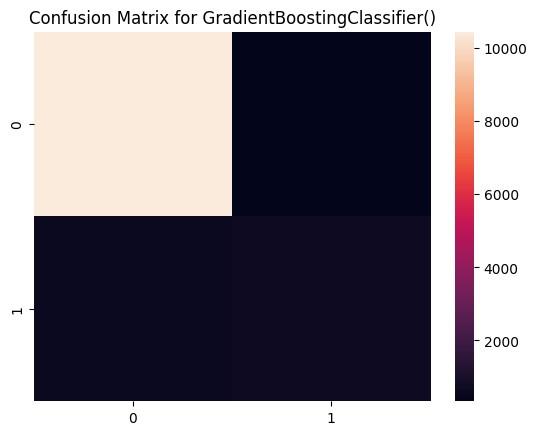

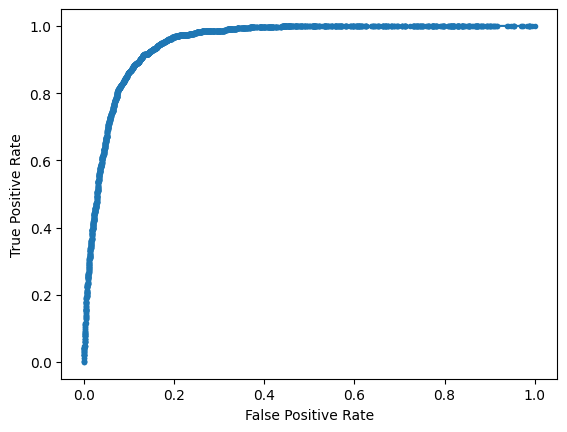

In [5]:
for model_class in [DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier]:
    model=model_class()
    prediction=model.fit(x_train, Y_train).predict(x_test)
    print(classification_report(Y_test, prediction)) 
    sns.heatmap(confusion_matrix(Y_test, prediction))
    plt.title(f'Confusion Matrix for {model}')
    plt.show()
    probs=model.predict_proba(x_test)[:,1]
    auc=roc_auc_score(Y_test, probs)
    lr_fpr, lr_tpr, _ = roc_curve(Y_test, probs)
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

Let's take a look at the feature importance after one iteration

After one iteration, we notice that we have a number of false positives; this may be due to the fact that our target variable is imbalanced. 
We can use the Imbalance-learn library to create a pipeline and resample our data, to see if the model performance improves

In [6]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     10758
           1       0.85      0.85      0.85     10825

    accuracy                           0.85     21583
   macro avg       0.85      0.85      0.85     21583
weighted avg       0.85      0.85      0.85     21583



/Users/michaelgriffin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


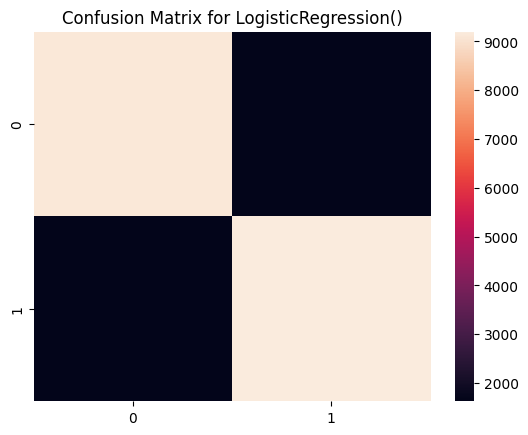

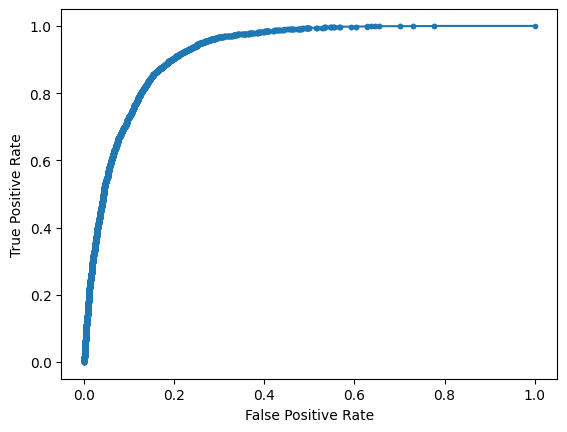

              precision    recall  f1-score   support

           0       0.99      0.87      0.92     10758
           1       0.88      0.99      0.93     10825

    accuracy                           0.93     21583
   macro avg       0.93      0.93      0.93     21583
weighted avg       0.93      0.93      0.93     21583



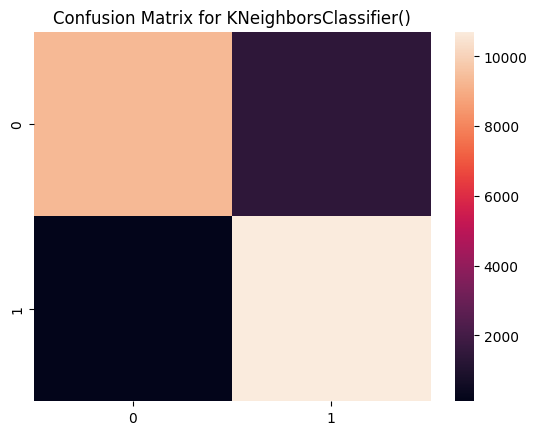

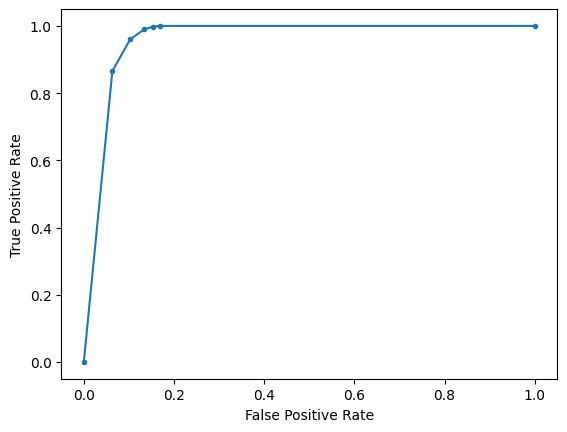

              precision    recall  f1-score   support

           0       0.76      0.75      0.75     10758
           1       0.75      0.77      0.76     10825

    accuracy                           0.76     21583
   macro avg       0.76      0.76      0.76     21583
weighted avg       0.76      0.76      0.76     21583



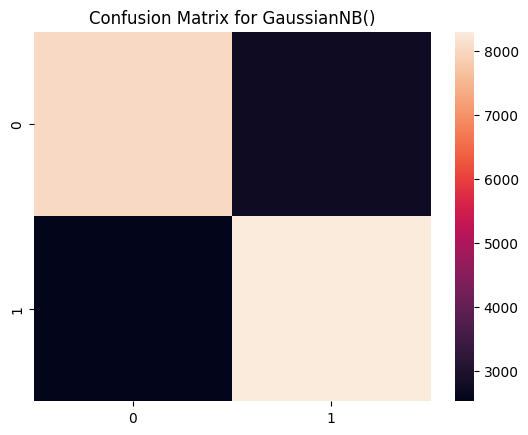

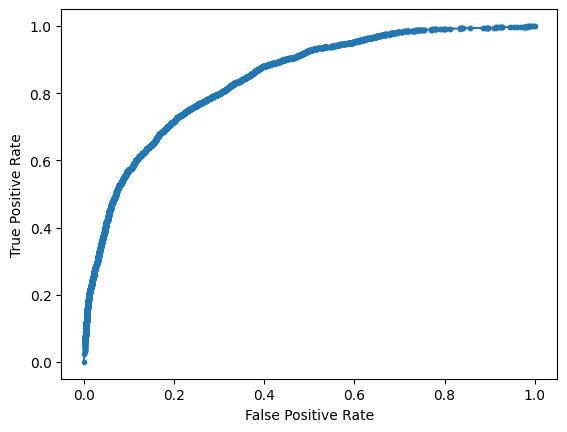

In [7]:
X=cleanonehot.drop(columns='y_encoded', axis=1)
y=cleanonehot['y_encoded']
X_over, y_over = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test=train_test_split(X_over,y_over,test_size= 0.30, random_state=16)
for model_class in [LogisticRegression, KNeighborsClassifier, GaussianNB]:
    model=model_class()
    prediction=model.fit(X_train, y_train).predict(X_test)
    print(classification_report(y_test, prediction)) 
    sns.heatmap(confusion_matrix(y_test, prediction))
    plt.title(f'Confusion Matrix for {model}')
    plt.show()
    probs=model.predict_proba(X_test)[:,1]
    auc=roc_auc_score(y_test, probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, probs)
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()  

Now let's try with the label encoded work

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     10758
           1       0.93      1.00      0.96     10825

    accuracy                           0.96     21583
   macro avg       0.97      0.96      0.96     21583
weighted avg       0.97      0.96      0.96     21583



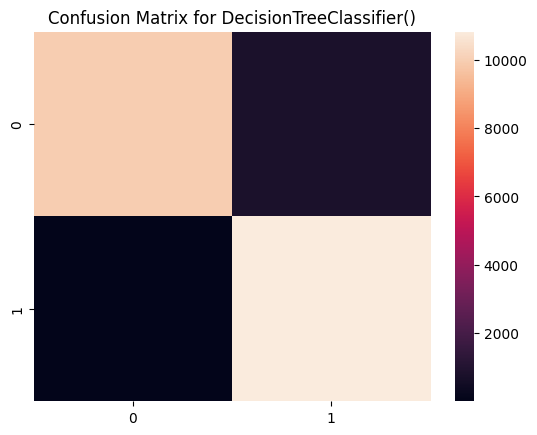

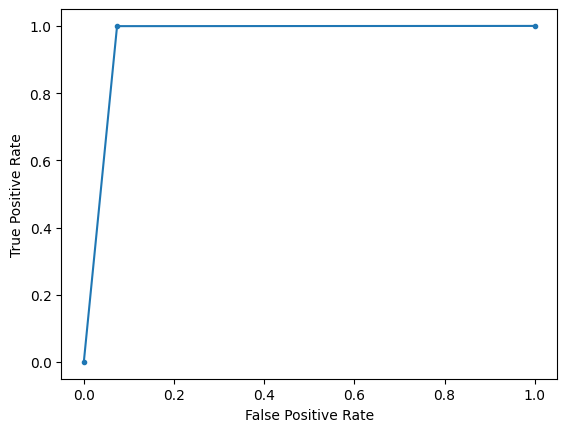

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     10758
           1       0.94      1.00      0.97     10825

    accuracy                           0.97     21583
   macro avg       0.97      0.97      0.97     21583
weighted avg       0.97      0.97      0.97     21583



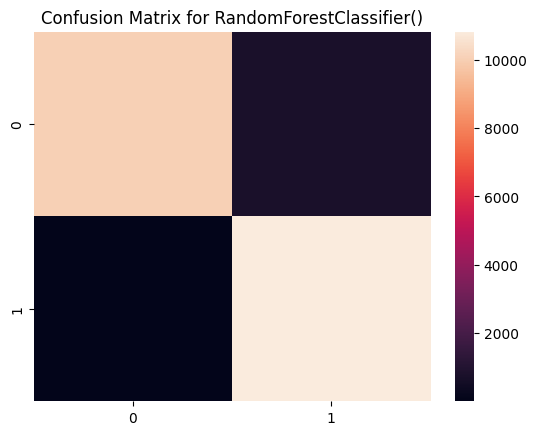

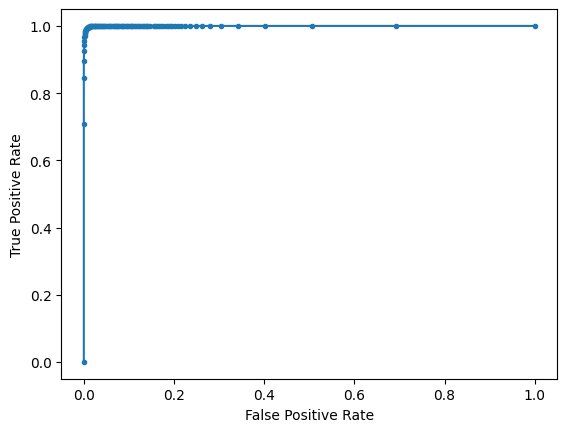

              precision    recall  f1-score   support

           0       0.94      0.85      0.89     10758
           1       0.87      0.94      0.90     10825

    accuracy                           0.90     21583
   macro avg       0.90      0.90      0.90     21583
weighted avg       0.90      0.90      0.90     21583



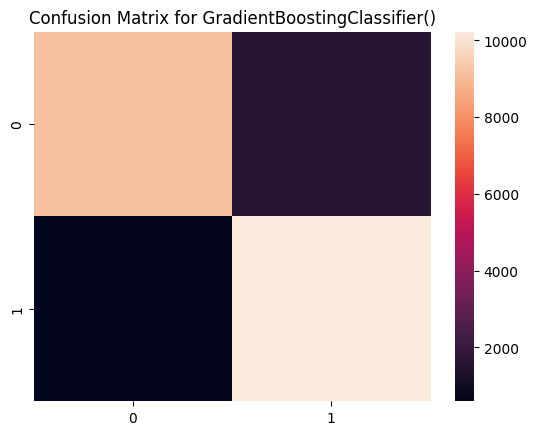

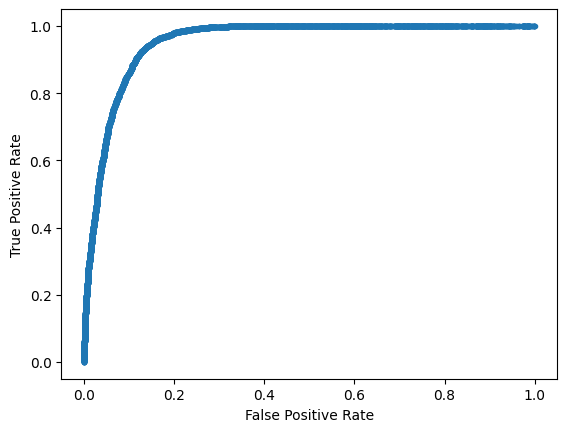

In [8]:
x=cleanlabeled.drop(columns='y_encoded',axis=1)
target=cleanlabeled['y_encoded']
x_train,x_test,Y_train,Y_test=train_test_split(x,target, test_size=0.30,random_state=16)
X_over, y_over = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test=train_test_split(X_over,y_over,test_size= 0.30, random_state=16)
for model_class in [DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier]:
    model=model_class()
    prediction=model.fit(X_train, y_train).predict(X_test)
    print(classification_report(y_test, prediction)) 
    sns.heatmap(confusion_matrix(y_test, prediction))
    plt.title(f'Confusion Matrix for {model}')
    plt.show()
    probs=model.predict_proba(X_test)[:,1]
    auc=roc_auc_score(y_test, probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, probs)
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show() 

In [11]:
from sklearn import svm, datasets
from sklearn.model_selection import RandomizedSearchCV
onehot=cleanonehot.copy(deep=True)
X=onehot.drop(columns='y_encoded', axis=1)
y=onehot['y_encoded']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size= 0.30, random_state=16)
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

kn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

models={
    "Logistic Regression":(LogisticRegression(),lr_params),
    "KNN": (KNeighborsClassifier(), kn_params),
    'Gauss':(GaussianNB(), nb_params)
}
for name, (model, params) in models.items():
    search = RandomizedSearchCV(model, params, n_iter=4, cv=5, scoring='accuracy', n_jobs=-1)
    search.fit(X_train, y_train)
    print(f'Best params for {name}: {search.best_params_}')



/Users/michaelgriffin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/michaelgriffin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

Best params for Logistic Regression: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1}
Best params for KNN: {'weights': 'uniform', 'n_neighbors': 5}
Best params for Gauss: {'var_smoothing': 1e-06}


In [15]:
labels=cleanlabeled.copy(deep=True)
X=labels.drop(columns='y_encoded', axis=1)
y=labels['y_encoded']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size= 0.30, random_state=16)
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2']
}
dt_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
xg_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}
models={
    "RF":(RandomForestClassifier(),rf_params),
    "DTC": (DecisionTreeClassifier(), dt_params),
    'XGBOOST':(GradientBoostingClassifier(), xg_params)
}
for name, (model, params) in models.items():
    search = RandomizedSearchCV(model, params, n_iter=4, cv=5, scoring='accuracy', n_jobs=-1)
    search.fit(X_train, y_train)
    print(f'Best params for {name}: {search.best_params_}')

Best params for RF: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True}


/Users/michaelgriffin/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/michaelgriffin/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/michaelgriffin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/michaelgriffin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 666, in _validate_par

Best params for DTC: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 5}
Best params for XGBOOST: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}


Now let's add the optimized parameters and try again.

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     10758
           1       0.91      1.00      0.95     10825

    accuracy                           0.95     21583
   macro avg       0.95      0.95      0.95     21583
weighted avg       0.95      0.95      0.95     21583



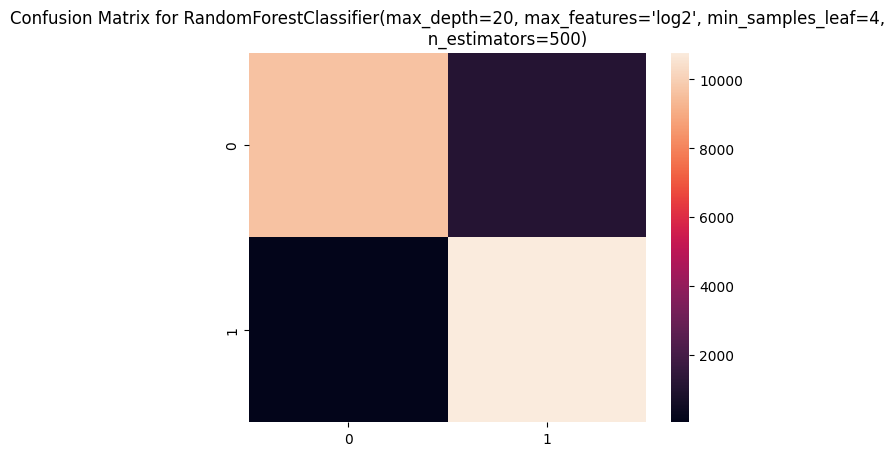

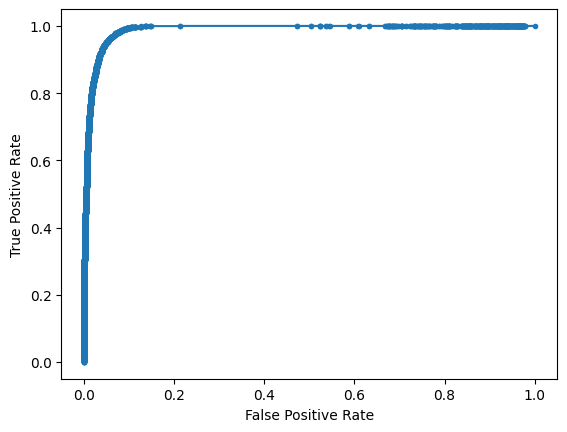

              precision    recall  f1-score   support

           0       0.85      0.81      0.83     10758
           1       0.82      0.86      0.84     10825

    accuracy                           0.83     21583
   macro avg       0.83      0.83      0.83     21583
weighted avg       0.83      0.83      0.83     21583



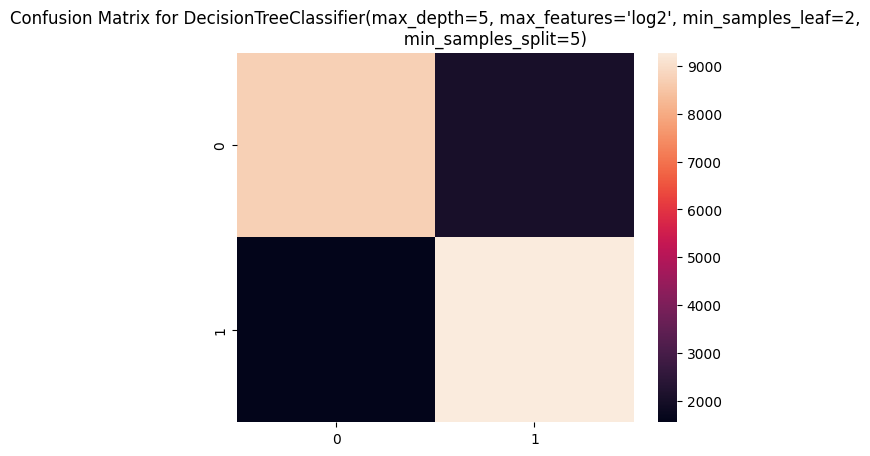

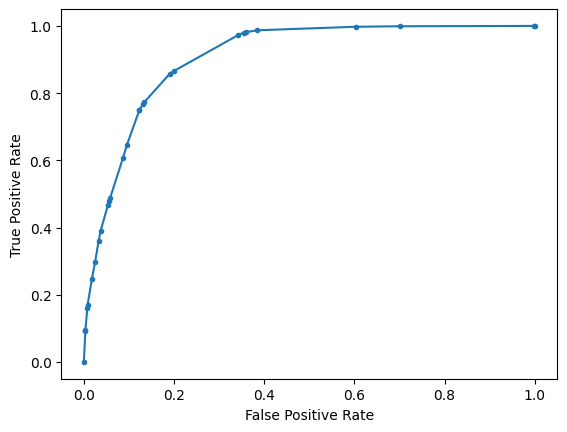

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     10758
           1       0.87      0.95      0.91     10825

    accuracy                           0.90     21583
   macro avg       0.91      0.90      0.90     21583
weighted avg       0.91      0.90      0.90     21583



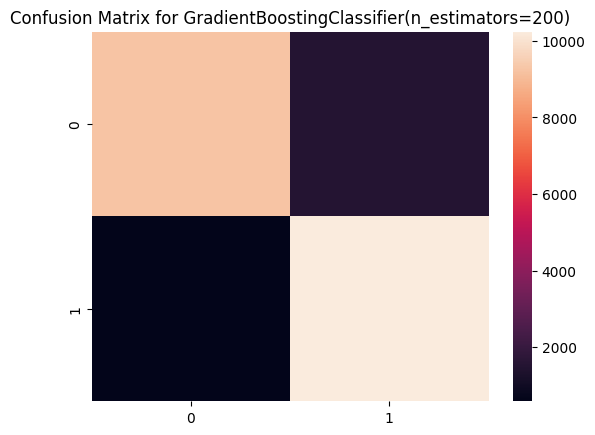

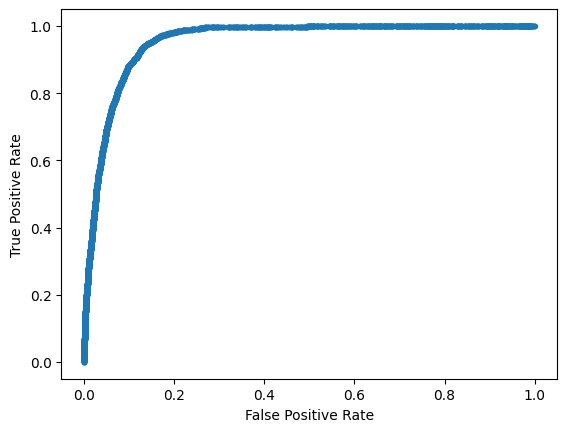

In [20]:
x=cleanlabeled.drop(columns='y_encoded',axis=1)
target=cleanlabeled['y_encoded']
x_train,x_test,Y_train,Y_test=train_test_split(x,target, test_size=0.30,random_state=16)
X_over, y_over = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test=train_test_split(X_over,y_over,test_size= 0.30, random_state=16)
rf_params = {
    'n_estimators': 500,
    'max_depth': 20,
    'min_samples_split': 2,
    'min_samples_leaf': 4,
    'bootstrap': True,
    'max_features': 'log2'
}
dt_params = {
    'max_depth': 5,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 'log2'
}
xg_params = {
    'n_estimators': 200,
    'max_depth': 3,
    'learning_rate': 0.1
}

models={
    "RF":(RandomForestClassifier(),rf_params),
    "DTC": (DecisionTreeClassifier(), dt_params),
    'XGBOOST':(GradientBoostingClassifier(), xg_params)
}
for model_name, (model, param) in models.items():
    model.set_params(**param)
    prediction=model.fit(X_train, y_train).predict(X_test)
    print(classification_report(y_test, prediction)) 
    sns.heatmap(confusion_matrix(y_test, prediction))
    plt.title(f'Confusion Matrix for {model}')
    plt.show()
    probs=model.predict_proba(X_test)[:,1]
    auc=roc_auc_score(y_test, probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, probs)
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show() 